In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [22]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [24]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [25]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [26]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [27]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement

Station = Base.classes.station

In [28]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Show what information is in the station data set
station_info = session.query(Station).first()
station_info.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x147eb7590>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [30]:
# Show what information is in the measurement data set
measurement_info = session.query(Measurement).first()
measurement_info.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x168008110>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1}

In [31]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [32]:
#Calculate the date one year from the last date in data set.

dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

datetime.datetime(2016, 8, 23, 0, 0)

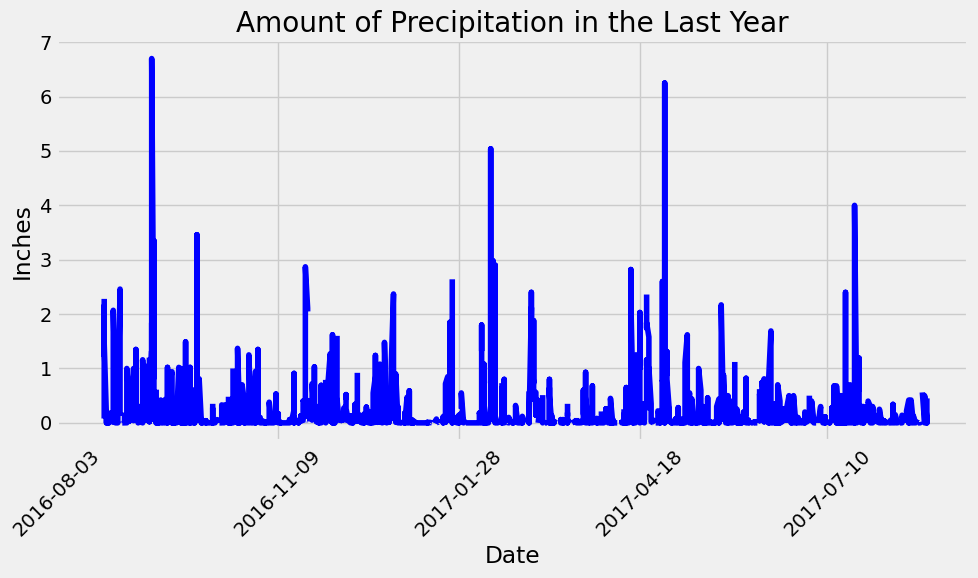

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Perform a query to retrieve the data and precipitation scores and put into variable
yearly_precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(yearly_precipitation, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
rain_df['Date'] = pd.to_datetime(rain_df['Date'])
rain_df = rain_df.sort_values('Date')
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,6))
plt.plot(rain_df['Date'], rain_df['Precipitation'], color='b')

#Label graph and axis
plt.title('Amount of Precipitation in the Last Year')
plt.xlabel('Date')
plt.ylabel('Inches')

#Set x-ticks
dates = ['2016-08-03', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
plt.xticks(ticks=pd.to_datetime(dates), labels=dates, rotation=45)

#Display Graph
plt.tight_layout()
plt.show()

In [63]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df['Precipitation'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

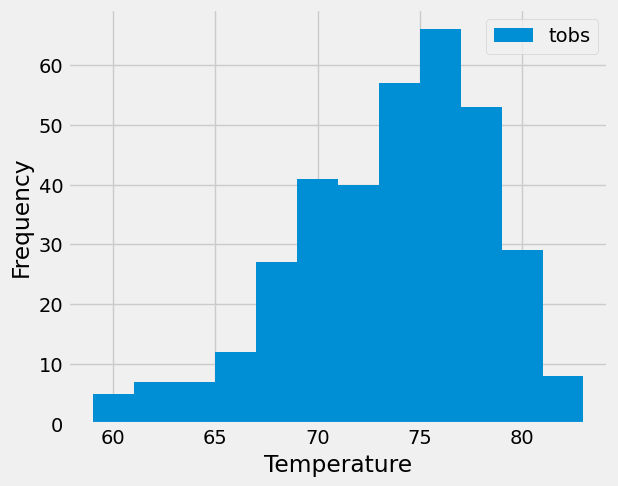

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()
